In [2]:
!pip install tensorflow

In [5]:
from tensorflow.keras.datasets import mnist

#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_train_samples = X_train.shape[0]
num_test_samples = y_test.shape[0]
image_height = X_train.shape[1]
image_width = X_train.shape[2]
print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))
print("y_train sample 5 value: " + str(y_train[5]))
print("Train samples: " + str(num_train_samples))
print("Test samples: " + str(num_test_samples))
print("Image height: " + str(image_height))
print("Image width: " + str(image_width))

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)
y_train sample 5 value: 2
Train samples: 60000
Test samples: 10000
Image height: 28
Image width: 28


The provided code is loading the MNIST dataset, which is a large database of handwritten digits that is commonly used for training various image processing systems. The dataset is loaded using the `mnist.load_data()` function, which returns two tuples: the first tuple contains the training data (`X_train`, `y_train`), and the second tuple contains the test data (`X_test`, `y_test`).

The training data `X_train` is a 3D array of grayscale image data with shape `(num_samples, 28, 28)`, where `num_samples` is the number of images, and `28, 28` is the height and width of the images in pixels. `y_train` is a 1D array of the labels for the images, with shape `(num_samples,)`.

The test data `X_test` and `y_test` have the same structure as the training data, but typically contain fewer samples.

The code then extracts and prints various pieces of information about the dataset:

- `num_train_samples` and `num_test_samples` are the number of training and test samples, respectively. These are obtained by getting the first dimension of the shape of `X_train` and `y_test`.
- `image_height` and `image_width` are the height and width of the images, respectively. These are obtained by getting the second and third dimensions of the shape of `X_train`.
- The shapes of `X_train`, `X_test`, `y_train`, and `y_test` are printed to provide a complete picture of the structure of the dataset.
- The label of the fifth training sample is printed as an example of the labels in `y_train`.
- The total number of training and test samples, and the height and width of the images are printed for reference.

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
# Conv2D expects 4 dimmensions; the last one is the number of channels
num_channels = 1

X_train = X_train.reshape(num_train_samples,image_height,
                          image_width,num_channels)
X_test = X_test.reshape(num_test_samples,image_height,
                        image_width,num_channels)
  
X_train = X_train / 255   # values [0..1] improve results
X_test = X_test / 255
    
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

print("categorical y_train shape: " + str(y_train.shape))
print("categorical y_train sample 5 value: " + str(y_train[5]))
num_classes = y_test.shape[1]
print("Number of classes: " + str(num_classes))

categorical y_train shape: (60000, 10)
categorical y_train sample 5 value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Number of classes: 10


The number of channels in an image depends on the color space of the image. For grayscale images, the number of channels is 1 because each pixel is represented by a single intensity value, ranging from 0 (black) to 255 (white). 

For color images in the RGB (Red, Green, Blue) color space, the number of channels is 3 because each pixel is represented by three intensity values (one for each color channel). 

In this case, the number of channels is set to 1, which suggests that the images being used are grayscale. If the images were in color, the number of channels would be set to 3.

This Python code is part of a Convolutional Neural Network (CNN) model preparation process, specifically for image classification tasks. It's using the Keras library, a popular high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

The first part of the code reshapes the training and testing datasets (`X_train` and `X_test`) to fit the input shape that the Conv2D layer in Keras expects. The Conv2D layer is a 2D convolution layer, a key component of many CNNs, and it expects input tensors to be 4D. The dimensions are usually (batch, height, width, channels), where 'batch' is the number of samples (images), 'height' and 'width' define the size of the image, and 'channels' refers to the color channels of the image (1 for grayscale images, 3 for RGB images). In this case, the images are grayscale, so `num_channels` is set to 1.

The next part of the code normalizes the pixel values of the images. The original pixel values for each image are in the range [0, 255], but neural networks converge faster with smaller input values. So, the pixel values are scaled down to a range between 0 and 1 by dividing each value by 255.

The `to_categorical` function is then used to convert class vector (integers) to binary class matrix, for use with categorical_crossentropy. This is a necessary step for multi-class classification problems. The function returns a binary matrix representation of the input vector, which is easier for the model to work with.

Finally, the code prints the shape of the newly categorical `y_train` array, the value of the 5th sample in `y_train`, and the number of classes in the dataset. The number of classes is determined by the shape of `y_test` along the second axis (i.e., `y_test.shape[1]`). This is because `to_categorical` transforms the class vector into a binary matrix, where each row corresponds to a sample and each column corresponds to a class. The number of columns, therefore, is the number of classes.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(image_height,image_width,num_channels)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))  
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(num_classes, activation='softmax'))

print(model.summary())

EPOCHS = 20
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=128, verbose=0)

/Users/jportilla/anaconda3/envs/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

None


The provided code is building and training a Convolutional Neural Network (CNN) model using the Keras API from TensorFlow for a classification task.

The model is initialized using the `Sequential()` function, which allows you to create models layer-by-layer in a step-by-step fashion.

The first layer is a 2D convolutional layer (`Conv2D`) with 16 filters, each of size 3x3. The activation function used is 'relu' (Rectified Linear Unit), and the `input_shape` parameter specifies the shape of the input image. 

The second layer is a 2D max pooling layer (`MaxPooling2D`) with a pool size of 2x2. This layer reduces the spatial dimensions (height, width) of the input volume.

The third layer is another 2D convolutional layer but with 32 filters. 

The fourth layer is another 2D max pooling layer, similar to the second layer.

The fifth layer is another 2D convolutional layer with 64 filters.

The sixth layer is a flatten layer (`Flatten`), which converts the 2D matrix data into a 1D vector. This is necessary because fully connected layers (like the upcoming Dense layers) expect input in a 1D format.

The seventh layer is a fully connected layer (`Dense`) with 32 neurons and 'relu' activation function.

The eighth layer is another fully connected layer with a number of neurons equal to the number of classes in the classification task. The activation function of the final layer is 'softmax', which makes it suitable for multi-class classification.

The `model.summary()` function is then called to print a summary representation of the model.

The model is then compiled with the 'categorical_crossentropy' loss function, 'rmsprop' optimizer, and it will measure 'accuracy' during training.

Finally, the model is trained using the `fit` method on the training data with a specified number of epochs and batch size. The `validation_data` parameter is set to the test data to evaluate the loss and any model metrics at the end of each epoch. The `verbose` parameter is set to 0, which means the training process will not output any messages.

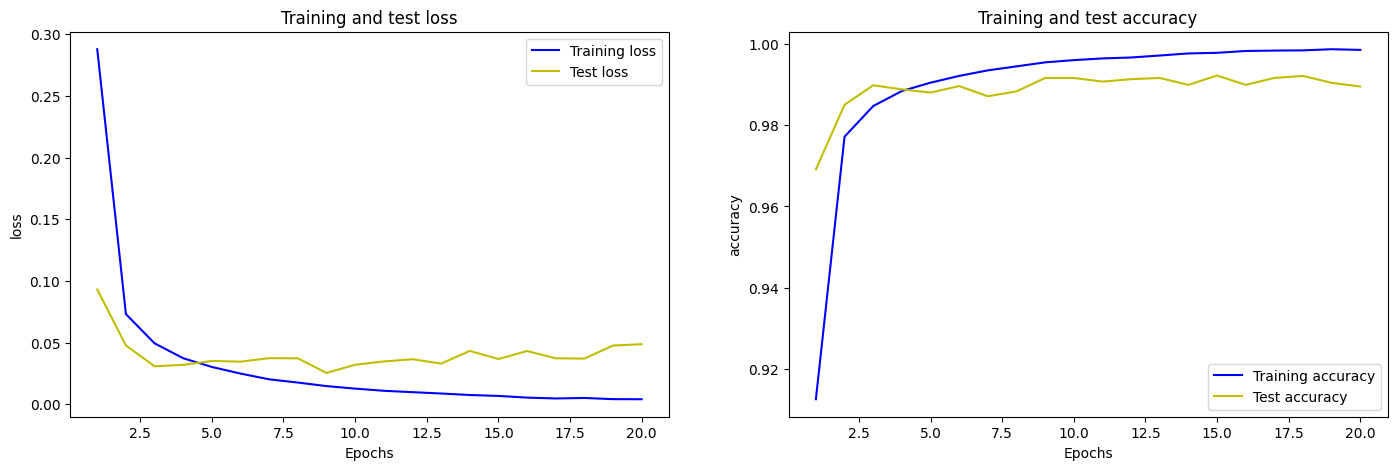

Loss: 0.049167729914188385
Accuracy: 0.9894999861717224


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot(h):
    LOSS = 0; ACCURACY = 1
    training = np.zeros((2,EPOCHS)); testing = np.zeros((2,EPOCHS))
    training[LOSS] = h.history['loss']
    testing[LOSS] = h.history['val_loss']    # validation loss
    training[ACCURACY] = h.history['accuracy']
    testing[ACCURACY] = h.history['val_accuracy']  # validation accuracy

    epochs = range(1,EPOCHS+1)
    fig, axs = plt.subplots(1,2, figsize=(17,5))
    for i, label in zip((LOSS, ACCURACY),('loss', 'accuracy')):   
        axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
        axs[i].plot(epochs, testing[i], 'y-', label='Test ' + label)
        axs[i].set_title('Training and test ' + label)
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel(label)
        axs[i].legend()
    plt.show()
    loss, accuracy = model.evaluate(X_test,y_test,verbose=0)
    print("Loss: " + str(loss))
    print("Accuracy: " + str(accuracy))

plot(history)

The provided code is building and training a Convolutional Neural Network (CNN) model using the Keras API from TensorFlow for a classification task.

The model is initialized using the `Sequential()` function, which allows you to create models layer-by-layer in a step-by-step fashion.

The first layer is a 2D convolutional layer (`Conv2D`) with 16 filters, each of size 3x3. The activation function used is 'relu' (Rectified Linear Unit), and the `input_shape` parameter specifies the shape of the input image. 

The second layer is a 2D max pooling layer (`MaxPooling2D`) with a pool size of 2x2. This layer reduces the spatial dimensions (height, width) of the input volume.

The third layer is another 2D convolutional layer but with 32 filters. 

The fourth layer is a dropout layer (`Dropout`) with a rate of 0.2, which randomly sets a fraction of input units to 0 at each update during training time, helping to prevent overfitting.

The fifth layer is a flatten layer (`Flatten`), which converts the 2D matrix data into a 1D vector. This is necessary because fully connected layers (like the upcoming Dense layers) expect input in a 1D format.

The sixth layer is a fully connected layer (`Dense`) with 16 neurons and 'relu' activation function.

The seventh layer is another fully connected layer with a number of neurons equal to the number of classes in the classification task. The activation function of the final layer is 'softmax', which makes it suitable for multi-class classification.

The `model.summary()` function is then called to print a summary representation of the model.

The model is then compiled with the 'categorical_crossentropy' loss function, 'rmsprop' optimizer, and it will measure 'accuracy' during training.

Finally, the model is trained using the `fit` method on the training data with a specified number of epochs and batch size. The `validation_data` parameter is set to the test data to evaluate the loss and any model metrics at the end of each epoch. The `verbose` parameter is set to 0, which means the training process will not output any messages.

The `plot` function is then called with the history of the model training to visualize the training process.

In [ ]:
#complete TODO sections


In [ ]:
model = Sequential()
#TODO: add a Conv2D layer with 16 filters, kernel size 3x3, relu activation function and input shape (28,28,1)
#model.add(*)
model.add(layers.MaxPooling2D((2,2)))
#TODO: add a Conv2D layer with 32 filters, kernel size 3x3, relu activation function
model.add(*) 
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
#TODO: add a Dense layer with 16 neurons and relu activation function
model.add(*) 
#TODO: add a Dense layer with 10 neurons and softmax activation function
model.add(layers.Dense(*) )

print(model.summary())

EPOCHS = 20
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=512, verbose=0)
plot(history)